In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('../data/ech_annonces_unified_68.csv',sep=';')
df.head()

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,REG,DEP,type_transaction,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,immo-facile-52417007,pr,m,l,0,116,NaN,5,1250,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ag672097-382986683,pr,a,l,3,44,NaN,3,600,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ag672097-383464082,pr,a,l,1,53,NaN,2,498,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ag680864-383044166,pr,a,l,0,41,NaN,2,460,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ag672097-380998252,pr,a,l,2,74,NaN,4,695,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df[["mapCoordonneesLatitude", "mapCoordonneesLongitude", "prix_m2_vente"]]

,mapCoordonneesLatitude,mapCoordonneesLongitude,prix_m2_vente
0,47.88299,7.19650,NaN
1,47.75081,7.32245,NaN
2,47.75094,7.32239,NaN
3,47.75204,7.32135,NaN
4,47.75075,7.32253,NaN
...,...,...,...
39434,47.58427,7.56462,4692.31
39435,48.21706,7.36406,2444.58
39436,48.21706,7.36406,2426.67
39437,47.81615,7.38146,2504.49


In [19]:
df_gare = pd.read_csv('../data/liste-des-gares.csv',sep=";")
df_gare

,CODE_UIC,LIBELLE,FRET,VOYAGEURS,CODE_LIGNE,RG_TRONCON,PK,COMMUNE,DEPARTEMEN,IDRESEAU,IDGAIA,X_L93,Y_L93,X_WGS84,Y_WGS84,C_GEO,Geo Point,Geo Shape
0,87586461,Cuzorn,N,N,631000,1,602+834,CUZORN,LOT-ET-GARONNE,109992,d98082e2-6667-11e3-89ff-01f464e0362d,5.366742e+05,6.384164e+06,0.944065,44.537408,"44.53740791364607, 0.9440645562374845","44.53740791362522, 0.9440645562374834","{""coordinates"": [0.944064556237483, 44.5374079..."
1,87671784,Gamarde-les-Bains,N,N,654000,1,166+250,GAMARDE-LES-BAINS,LANDES,109995,e553e9e2-6667-11e3-a7ff-01f464e0362d,3.877218e+05,6.298690e+06,-0.875845,43.718247,"43.71824712724352, -0.8758453662157154","43.718247127220565, -0.8758453662157185","{""coordinates"": [-0.875845366215719, 43.718247..."
2,87583807,Vars,N,N,570000,3,435+828,VARS,CHARENTE,110001,d97737ce-6667-11e3-89ff-01f464e0362d,4.775301e+05,6.522490e+06,0.137009,45.765719,"45.76571862432463, 0.13700883586422682","45.76571862430718, 0.13700883586422444","{""coordinates"": [0.137008835864224, 45.7657186..."
3,87338590,Monte-Carlo-Country-Club,N,O,930000,1,243+480,ROQUEBRUNE-CAP-MARTIN,ALPES-MARITIMES,110003,c0cae298-f312-11e3-90ff-015864e0362d,1.058310e+06,6.305382e+06,7.450723,43.756553,"43.75655287606431, 7.450722512060252","43.75655287604143, 7.450722512060253","{""coordinates"": [7.450722512060253, 43.7565528..."
4,87478248,La Boussac,N,N,415000,1,128+579,LA BOUSSAC,ILLE-ET-VILAINE,110006,e54c368a-6667-11e3-a7ff-01f464e0362d,3.559508e+05,6.834234e+06,-1.661338,48.516932,"48.51693157988218, -1.6613379776804635","48.516931579858365, -1.6613379776804675","{""coordinates"": [-1.661337977680468, 48.516931..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6464,87485078,L'Île-d'Elle,N,N,530000,1,149+888,L'ILE-D'ELLE,VENDEE,117389,e53e805a-6667-11e3-a7ff-01f464e0362d,3.963769e+05,6.588283e+06,-0.948170,46.326123,"46.326123153561475, -0.9481702692113159","46.32612315354566, -0.9481702692113191","{""coordinates"": [-0.948170269211319, 46.326123..."
6465,87546291,Rungis-la-Fraternelle,N,O,990331,1,007+130,RUNGIS,VAL-DE-MARNE,117407,d9a98a82-6667-11e3-89ff-01f464e0362d,6.528675e+05,6.850397e+06,2.358919,48.751967,"48.751966726905344, 2.3589185928132115","48.75196672688274, 2.358918592813211","{""coordinates"": [2.358918592813211, 48.7519667..."
6466,87393652,Petit-Vaux,N,O,990000,4,096+650,EPINAY-SUR-ORGE,ESSONNE,117432,e02e7a9c-19bf-11e5-82ff-01fc64e0362d,6.509226e+05,6.842000e+06,2.333429,48.676293,"48.67629298650436, 2.333429409981934","48.67629298648138, 2.3334294099819335","{""coordinates"": [2.333429409981933, 48.6762929..."
6467,87144006,Épinal,O,O,42000,1,050+961,EPINAL,VOSGES,117765,d9971ab6-6667-11e3-89ff-01f464e0362d,9.557180e+05,6.791954e+06,6.441425,48.177782,"48.177782023490956, 6.441424945910085","48.17778202348058, 6.441424945910087","{""coordinates"": [6.441424945910087, 48.1777820..."


In [20]:
df_gare['DEPARTEMEN'].value_counts()

DEPARTEMEN
NORD                       235
MOSELLE                    149
PAS-DE-CALAIS              146
BAS-RHIN                   146
SEINE-MARITIME             134
                          ... 
ARIEGE                      20
GERS                        20
ALPES-DE-HAUTE-PROVENCE     19
TERRITOIRE-DE-BELFORT       17
CORSE-DU-SUD                 9
Name: count, Length: 96, dtype: int64

In [21]:
df_gare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODE_UIC    6469 non-null   int64  
 1   LIBELLE     6469 non-null   object 
 2   FRET        6469 non-null   object 
 3   VOYAGEURS   6469 non-null   object 
 4   CODE_LIGNE  6469 non-null   int64  
 5   RG_TRONCON  6469 non-null   int64  
 6   PK          6469 non-null   object 
 7   COMMUNE     6469 non-null   object 
 8   DEPARTEMEN  6469 non-null   object 
 9   IDRESEAU    6469 non-null   int64  
 10  IDGAIA      6469 non-null   object 
 11  X_L93       6469 non-null   float64
 12  Y_L93       6469 non-null   float64
 13  X_WGS84     6469 non-null   float64
 14  Y_WGS84     6469 non-null   float64
 15  C_GEO       6469 non-null   object 
 16  Geo Point   6469 non-null   object 
 17  Geo Shape   6469 non-null   object 
dtypes: float64(4), int64(4), object(10)
memory usage: 909.8+ KB


In [22]:
# create year month days column from date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [23]:
df['INSEE_COM']

0        68159
1        68224
2        68224
3        68224
4        68224
         ...  
39434    68297
39435    68285
39436    68285
39437    68022
39438    68022
Name: INSEE_COM, Length: 39439, dtype: int64

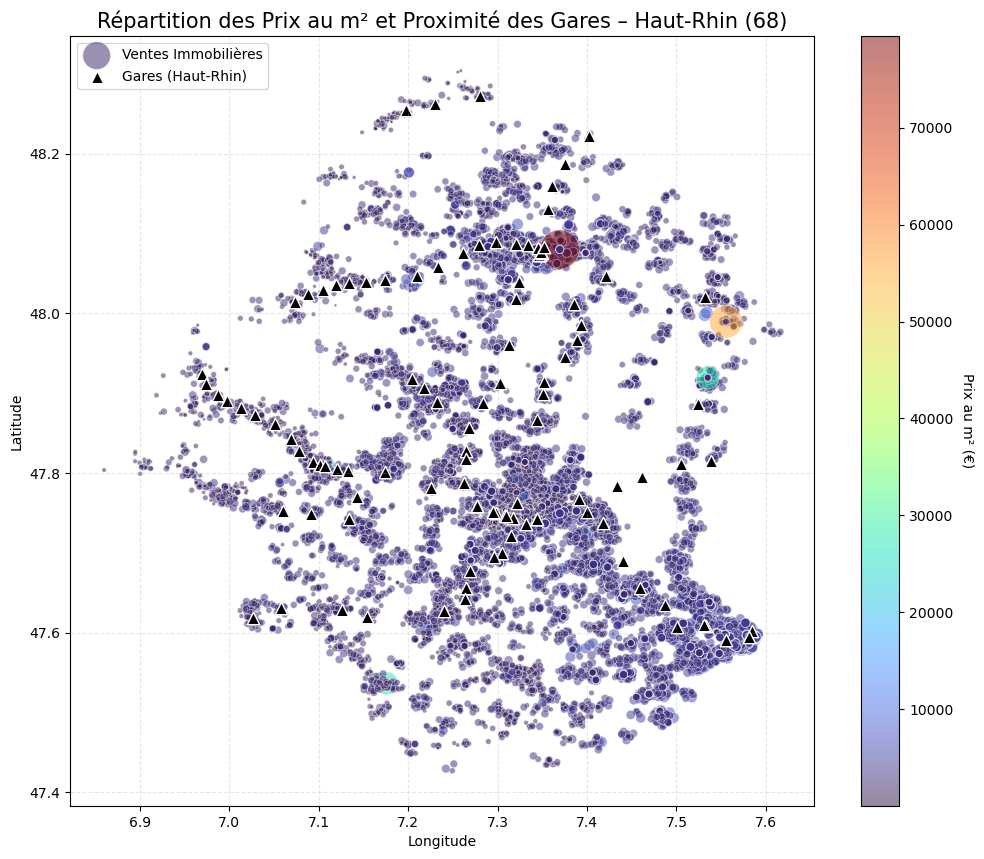

In [24]:
# 1. Nettoyage et Filtrage des gares sur le 68
# On s'assure que le département correspond bien (en majuscules)
df_gare_68 = df_gare[df_gare['DEPARTEMEN'] == 'HAUT-RHIN'].copy()

# Suppression des gares sans coordonnées pour éviter les erreurs de tracé
df_gare_68 = df_gare_68.dropna(subset=["X_WGS84", "Y_WGS84"])

# 2. Nettoyage des données immobilières (votre code)
df_clean = df.dropna(subset=["mapCoordonneesLatitude", "mapCoordonneesLongitude", "prix_m2_vente"]).copy()

# 3. Création de la figure
plt.figure(figsize=(12, 10))

# --- TRACÉ DES VENTES (Cercle de couleur) ---
scatter = plt.scatter(
    x=df_clean["mapCoordonneesLongitude"], 
    y=df_clean["mapCoordonneesLatitude"], 
    c=df_clean["prix_m2_vente"], 
    s=df_clean["prix_m2_vente"] / 100, 
    cmap="turbo", 
    alpha=0.5, 
    edgecolors="w", 
    linewidth=0.5,
    label="Ventes Immobilières"
)

# --- TRACÉ DES GARES (Triangles Noirs) ---
plt.scatter(
    x=df_gare_68["X_WGS84"], 
    y=df_gare_68["Y_WGS84"], 
    c="black", 
    marker="^", 
    s=80,      # Un peu plus gros pour bien les voir
    alpha=1, 
    edgecolors="white",
    label="Gares (Haut-Rhin)"
)

# 4. Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Prix au m² (€)', rotation=270, labelpad=15)

# 5. Habillage
plt.title("Répartition des Prix au m² et Proximité des Gares – Haut-Rhin (68)", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper left")

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

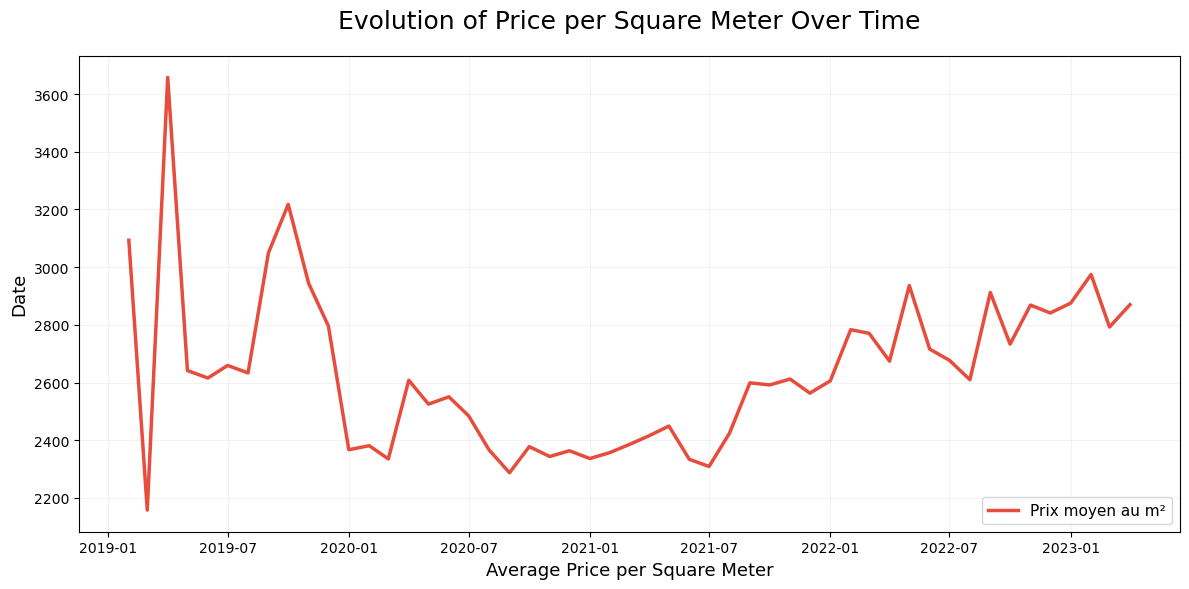

In [25]:
# visualize the evolution the price over the years
df_evolution = df.groupby('date')['prix_m2_vente'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_evolution, x='date', y='prix_m2_vente',color='#e74c3c', linewidth=2.5, label='Prix moyen au m²')
plt.title('Evolution of Price per Square Meter Over Time', fontsize=18, pad=20)
plt.ylabel('Date', fontsize=13)
plt.xlabel('Average Price per Square Meter', fontsize=13)
plt.grid(True, alpha=0.15)
plt.legend(loc='lower right', frameon=True, fontsize=11)

plt.tight_layout()
plt.show()


### # Analyse Immobilière : De la Normalité (2019) à la Crise Covid (2023)

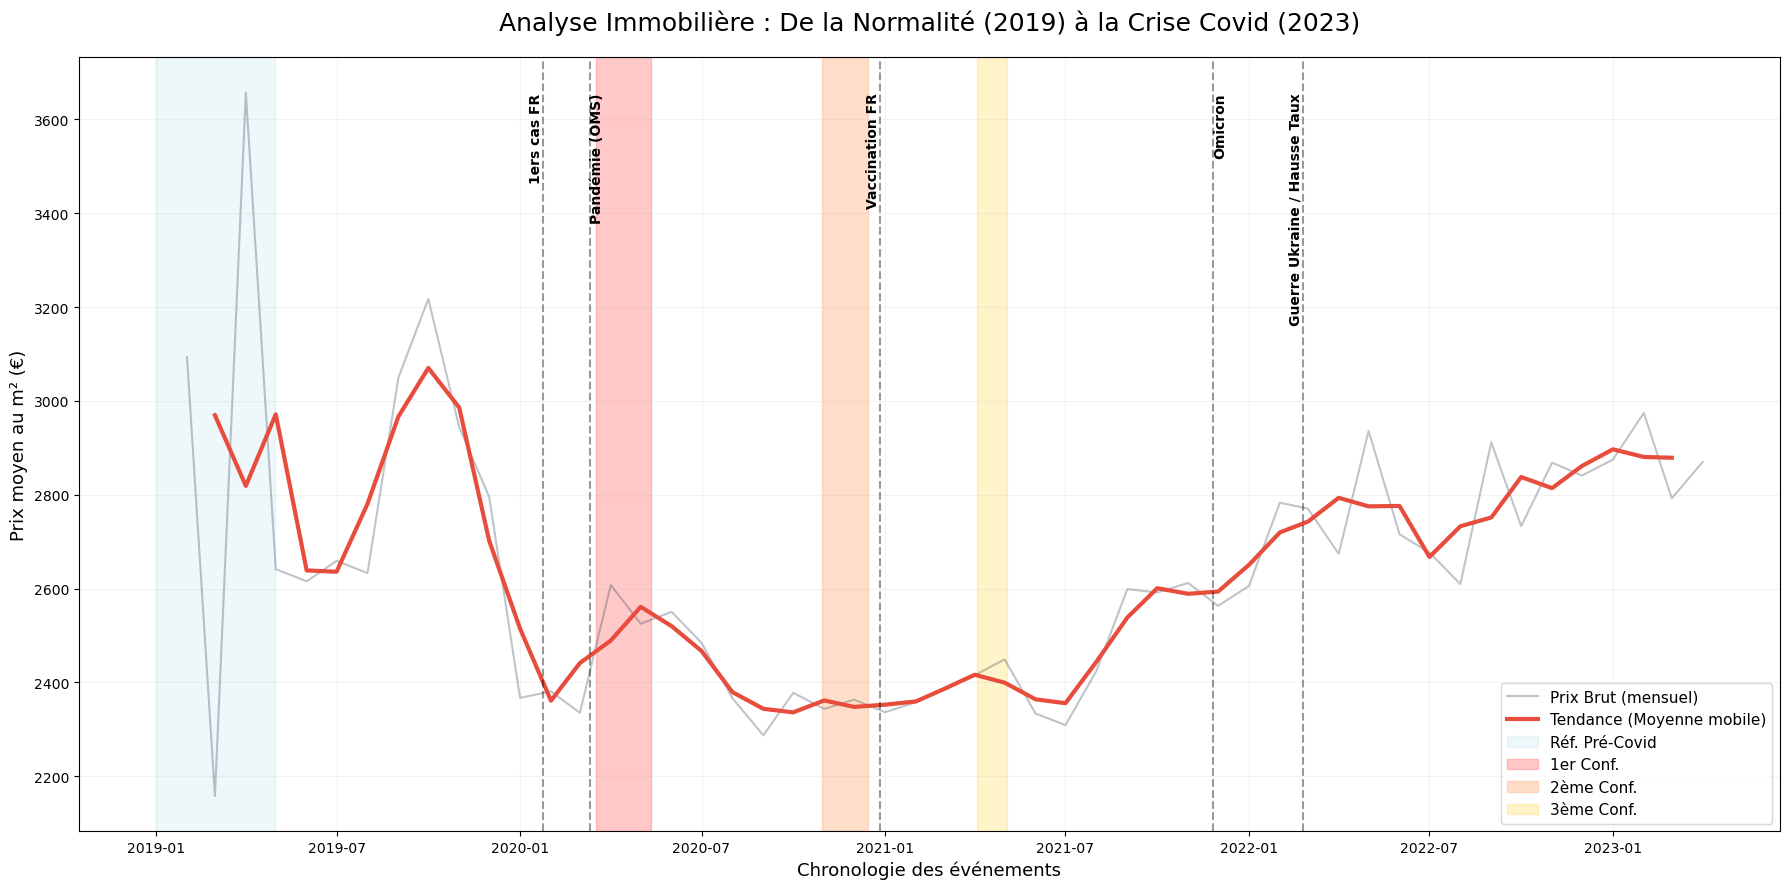

In [26]:
# 1. Configuration des périodes
# Ajout de la période de référence 2019 que vous avez demandée
reference_2019 = {'label': 'Réf. Pré-Covid', 'start': '2019-01-01', 'end': '2019-04-30', 'color': '#add8e6'}

confinements = [
    {'label': '1er Conf.', 'start': '2020-03-17', 'end': '2020-05-11', 'color': '#ff4d4d'},
    {'label': '2ème Conf.', 'start': '2020-10-30', 'end': '2020-12-15', 'color': '#ff944d'},
    {'label': '3ème Conf.', 'start': '2021-04-03', 'end': '2021-05-03', 'color': '#ffdb4d'}
]

milestones = [
    {'date': '2020-01-24', 'label': '1ers cas FR', 'ha': 'right'},
    {'date': '2020-03-11', 'label': 'Pandémie (OMS)', 'ha': 'left'},
    {'date': '2020-12-27', 'label': 'Vaccination FR', 'ha': 'right'},
    {'date': '2021-11-26', 'label': 'Omicron', 'ha': 'left'},
    {'date': '2022-02-24', 'label': 'Guerre Ukraine / Hausse Taux', 'ha': 'right'},
    {'date': '2023-05-05', 'label': 'Fin Urgence Mondiale', 'ha': 'left'}
]

# Calcul d'une moyenne mobile sur 3 mois pour lisser les pics de 2019
df_evolution['prix_lisse'] = df_evolution['prix_m2_vente'].rolling(window=3, center=True).mean()

plt.figure(figsize=(18, 9))

# 2. Tracés des courbes
# Courbe réelle en transparence
sns.lineplot(data=df_evolution, x='date', y='prix_m2_vente', color='#2c3e50', alpha=0.3, label='Prix Brut (mensuel)')
# Courbe lissée pour la tendance de fond
sns.lineplot(data=df_evolution, x='date', y='prix_lisse', color='#e74c3c', linewidth=3, label='Tendance (Moyenne mobile)')

# 3. Ajout des zones (Référence 2019 + Confinements)
plt.axvspan(pd.to_datetime(reference_2019['start']), pd.to_datetime(reference_2019['end']), 
            color=reference_2019['color'], alpha=0.2, label=reference_2019['label'])

for conf in confinements:
    plt.axvspan(pd.to_datetime(conf['start']), pd.to_datetime(conf['end']), 
                color=conf['color'], alpha=0.3, label=conf['label'])

# 4. Événements et mise en forme
y_max = df_evolution['prix_m2_vente'].max()
for m in milestones:
    date_obj = pd.to_datetime(m['date'])
    if date_obj >= df_evolution['date'].min() and date_obj <= df_evolution['date'].max():
        plt.axvline(date_obj, color='black', linestyle='--', alpha=0.4)
        plt.text(date_obj, y_max, m['label'], rotation=90, verticalalignment='top', fontsize=10, fontweight='bold', horizontalalignment=m['ha'])

plt.title('Analyse Immobilière : De la Normalité (2019) à la Crise Covid (2023)', fontsize=18, pad=20)
plt.ylabel('Prix moyen au m² (€)', fontsize=13)
plt.xlabel('Chronologie des événements', fontsize=13)
plt.grid(True, alpha=0.15)
plt.legend(loc='lower right', frameon=True, fontsize=11)

plt.tight_layout()
plt.show()